In [46]:
import pandas as pd
import os
import numpy as np

In [ ]:
## confused what are their second language
## for AOA group, what's the definition?

In [107]:
data = pd.read_csv(os.path.expanduser('~/Hernandez/All Descriptive Data/Corrected2018_DataforMRIs DO NOT EDIT.csv'))
data = data.replace('unknown', pd.NA)
data = data.fillna(np.nan)
data

,fsid,LanguageGroup,Gender,AoA Group,AoA,Age,YearsEnglishEdu,YearsSpanishEdu,PercentEngPictureVocabulary,PercentEngPassageComprehension,...,BirthPlace,StudyName,PercentEngListeningComprehension,PercentSpanListeningComprehension,BNTEnglish,BNTSpanish,DailyE,DailyS,Eprof,Sprof
0,Sub01FS,Bilingual,F,Late,7,18.0,8.0,6.0,0.661017,0.787879,...,US,CognitiveControl,NaN,NaN,NaN,NaN,0.8,0.2,0.724448,0.699666
1,Sub02FS,Bilingual,F,Late,10,22.0,12.0,22.0,0.711864,0.696970,...,US,CognitiveControl,NaN,NaN,NaN,NaN,0.75,0.25,0.704417,0.646830
2,Sub03FS,Bilingual,M,Late,11,19.0,12.0,11.0,0.610169,0.757576,...,Else,CognitiveControl,NaN,NaN,NaN,NaN,0.5,0.5,0.683873,0.748053
3,Sub04FS,Bilingual,M,Early,4,20.0,11.0,2.0,0.694915,0.848485,...,US,CognitiveControl,NaN,NaN,NaN,NaN,0.9,0.1,0.771700,0.692158
4,Sub05FS,Bilingual,M,Late,8,23.0,15.0,22.0,0.694915,0.848485,...,US,CognitiveControl,NaN,NaN,NaN,NaN,0.7,0.3,0.771700,0.845940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,UH_T,Monolingual,F,Mono,NaN,19.0,NaN,NaN,0.762712,NaN,...,US,PhonemicLearning,0.818182,NaN,NaN,NaN,1,0,0.790447,NaN
359,UH_U,Monolingual,M,Mono,NaN,21.0,NaN,NaN,0.779661,NaN,...,US,PhonemicLearning,0.939394,NaN,NaN,NaN,1,0,0.859527,NaN
360,UH_V,Bilingual,M,Early,4,18.0,14.0,NaN,0.677966,NaN,...,US,PhonemicLearning,0.727273,0.53125,NaN,NaN,0.65,0.35,0.702619,0.532866
361,UH_Y,Bilingual,F,Late,10,22.0,NaN,NaN,0.678000,NaN,...,NaN,PhonemicLearning,0.757500,0.7813,NaN,NaN,none,none,0.717750,0.752700


In [108]:
#check the subs' information, 1 missing demographic information
# brain_subs = np.load(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/array_brains/Anat-Bilingual-64iso-Hernandez-S361.npz'))['subs']
# subs = [brain_subs[i][:-4] for i in range(0,len(brain_subs))]
# name_overlap = [sub in data.fsid.tolist() for sub in subs]
# 'Sub01FS' in data.fsid
# n = 0
# for i in name_overlap:
    
#     if not i:
#         print("The first false value is:", n)
#         break
#     n = n+1
# name_overlap[121]
# subs[121]
# data.fsid.tolist()

In [109]:
data = data.copy()

In [129]:
data.loc[:,'participant_id'] = data.loc[:,('fsid')]
data.loc[:,'sex'] = data.loc[:,('Gender')]

In [111]:
data.loc[data['LanguageGroup']=='Bilingual','bilingualism'] = 1
data.loc[data['LanguageGroup']=='Monolingual','bilingualism'] = 0
data.bilingualism.value_counts()

1.0    218
0.0    145
Name: bilingualism, dtype: int64

<Axes: >

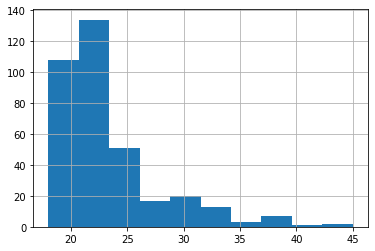

In [112]:
data.loc[:, 'age'] = data.loc[:,'Age']
data.age.hist()

<ipython-input-116-70af21d619d0>:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'aoa'] = data.loc[:,'AoA'].astype(float)


<Axes: >

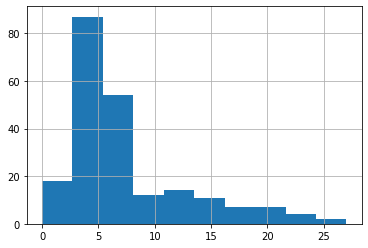

In [116]:
data.loc[:, 'aoa'] = data.loc[:,'AoA'].astype(float)
data.loc[:, 'aoa'].hist()

In [118]:
data['AoA Group'].value_counts()

Mono     145
Early    108
Late      81
Sim       27
Name: AoA Group, dtype: int64

In [123]:
data.loc[data['AoA Group']=='Late', 'aoa_group'] = 'LB'
data.loc[data['AoA Group']=='Early', 'aoa_group'] = 'EB'
data.loc[data['AoA Group']=='Sim', 'aoa_group'] = 'EB'
data.loc[data['AoA Group']=='Mono', 'aoa_group'] = pd.NA
data.aoa_group.value_counts()

EB    135
LB     81
Name: aoa_group, dtype: int64

<Axes: >

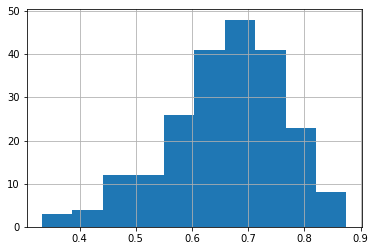

In [125]:
data.loc[:, 'sec_lan_proficiency'] = data.loc[data.bilingualism == 1, ['Eprof', 'Sprof']].min(axis=1)

In [126]:
data.loc[:, 'ds']='Hernandez'

In [127]:
data.loc[:, 'scanner']='Hernandez'

In [130]:
legend = data.loc[:, ['participant_id', 'bilingualism', 'age', 'sex', 
              'aoa', 'aoa_group', 'sec_lan_proficiency',
              'ds', 'scanner']]

In [131]:
legend

,participant_id,bilingualism,age,sex,aoa,aoa_group,sec_lan_proficiency,ds,scanner
0,Sub01FS,1.0,18.0,F,7.0,LB,0.699666,Hernandez,Hernandez
1,Sub02FS,1.0,22.0,F,10.0,LB,0.646830,Hernandez,Hernandez
2,Sub03FS,1.0,19.0,M,11.0,LB,0.683873,Hernandez,Hernandez
3,Sub04FS,1.0,20.0,M,4.0,EB,0.692158,Hernandez,Hernandez
4,Sub05FS,1.0,23.0,M,8.0,LB,0.771700,Hernandez,Hernandez
...,...,...,...,...,...,...,...,...,...
358,UH_T,0.0,19.0,F,NaN,<NA>,NaN,Hernandez,Hernandez
359,UH_U,0.0,21.0,M,NaN,<NA>,NaN,Hernandez,Hernandez
360,UH_V,1.0,18.0,M,4.0,EB,0.532866,Hernandez,Hernandez
361,UH_Y,1.0,22.0,F,10.0,LB,0.717750,Hernandez,Hernandez


In [132]:
legend.to_csv(
    os.path.expanduser('~/Documents/Bilingualism_CVAE/data/legend/Hernandez.csv'),
    index = False)